# Spotify User Behaviour

Data source: https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset/data

## Introduction

Spotify, a Swedish audio streaming and media service provider, is one of the largest platforms for music streaming worldwide. For a company like Spotify to maintain its competitive edge and fuel further growth, understanding user behaviour is crucial. By analyzing user data, Spotify can uncover insights into various factors like age demographics, listening patterns, and preferences. For example, knowing the distribution of users across different age groups can help Spotify either refine its focus on its most engaged audience or target underrepresented groups to expand its user base. In this analysis, we will explore a dataset to identify trends, behaviours, and patterns that can provide valuable insights into Spotify's user base.

## Dataset Overview

In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
# import dataset
df = pd.read_excel('Spotify_data.xlsx')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [9]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


## Data Cleaning and Preprocessing

In [11]:
# Change column names to snake_case while fixing typos
df.columns = ['age', 'gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preferred_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preferred_pod_format',
       'pod_host_preference', 'preferred_pod_duration',
       'pod_variety_satisfaction']

In [12]:
# Check for null values
df.isna().sum()

age                              0
gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preferred_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preferred_pod_format           140
pod_host_preference            141
preferred_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

I noticed a significant number of null values in the columns *preferred_premium_plan, fav_pod_genre, preferred_pod_format, pod_host_preference*, and *preferred_pod_duration*. After analyzing the first five rows of the dataset, I found that *preferred_premium_plan* has null values whenever *premium_sub_willingness* is 'No'. This makes sense, as users who are not willing to subscribe would naturally leave their preferred premium plan unanswered.  
I see a similar pattern for the columns about Podcast where *fav_pod_genre, preferred_pod_format, pod_host_preference*, and *preferred_pod_duration* are null when *pod_lis_frequency* is 'Never'.

In [14]:
# Count the number of null values for 'preferred_premium_plan' when 'premium_sub_willingness' is 'No'
df.loc[df['premium_sub_willingness'] == 'No', 'preferred_premium_plan'].isna().sum()

203

In [15]:
# Count the number of null values for Podcast related columns when 'pod_lis_frequency' is 'Never'
df.loc[df['pod_lis_frequency'] == 'Never', df.columns[15:19]].apply(lambda x: x.isna().sum())

fav_pod_genre             119
preferred_pod_format      112
pod_host_preference       110
preferred_pod_duration    109
dtype: int64

Most of the null values occur when *premium_sub_willingness* is 'No' or *pod_lis_frequency* is 'Never', which is as expected. Since these null values are not errors and the other columns still contain meaningful data, we have decided to keep the rows with null values.

In [17]:
# Identify dupicate rows
df.loc[df.duplicated()]

,age,gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preferred_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preferred_pod_format,pod_host_preference,preferred_pod_duration,pod_variety_satisfaction
194,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,"While Traveling, leisure time",recommendations,4,Never,NaN,NaN,NaN,NaN,Ok


There is one row that is identical to another in the dataset. However, we cannot be certain that it is a true duplicate, as the dataset does not include a primary key for each record. This means that identical rows could actually represent distinct entries that simply happen to have the same values across all columns. For this reason, we have decided to keep this row.

## Feature Understanding (Univariate analysis)

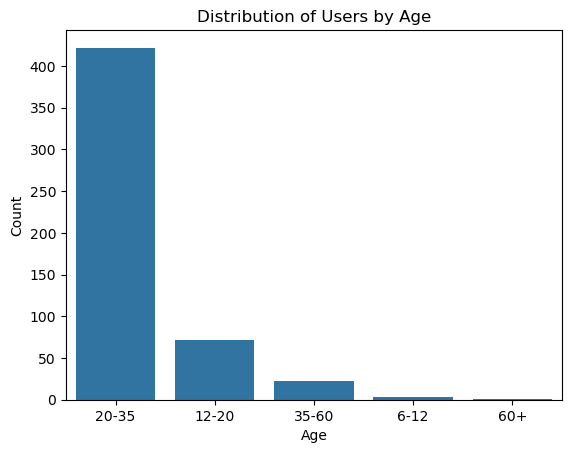

In [20]:
# Age
sns.countplot(x = df['age'])
plt.title('Distribution of Users by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

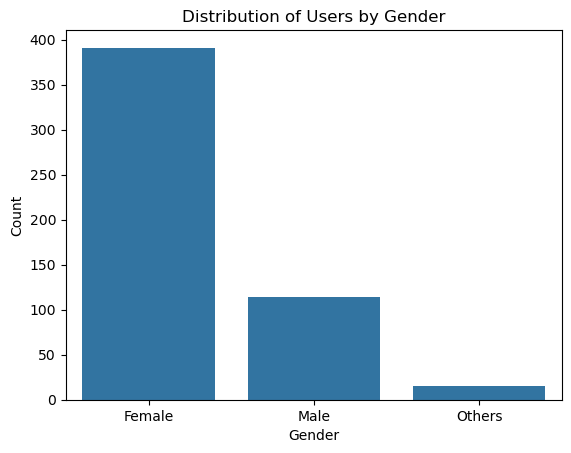

In [21]:
# Gender
sns.countplot(x = df['gender'])
plt.title('Distribution of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

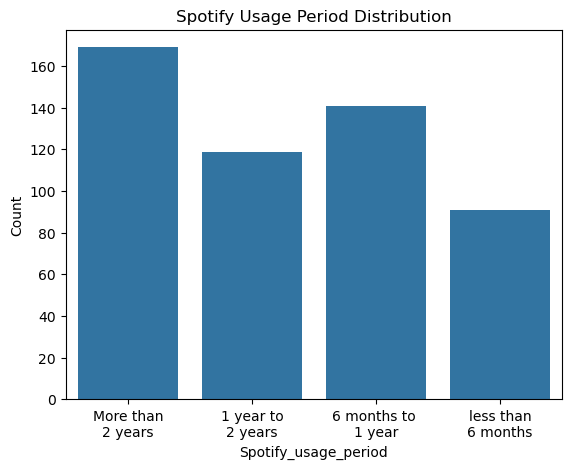

In [22]:
# Spotify usage period
sns.countplot(x = df['spotify_usage_period'])
plt.title('Spotify Usage Period Distribution')
plt.xlabel('Spotify_usage_period')
plt.ylabel('Count')
labels = ['More than\n2 years', '1 year to\n2 years', '6 months to \n1 year', 'less than\n6 months']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

The *spotify_listening_device* column does not contain unique values for each row; instead, it holds multiple values separated by commas (e.g., 'Smartphone, Computer or laptop').

In [24]:
df['spotify_listening_device'].unique()

array(['Smart speakers or voice assistants', 'Computer or laptop',
       'Smartphone, Smart speakers or voice assistants', 'Smartphone',
       'Smartphone, Computer or laptop',
       'Smartphone, Computer or laptop, Smart speakers or voice assistants',
       'Smartphone, Wearable devices',
       'Smartphone, Computer or laptop, Wearable devices',
       'Computer or laptop, Wearable devices',
       'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices',
       'Wearable devices',
       'Smartphone, Smart speakers or voice assistants, Wearable devices',
       'Computer or laptop, Smart speakers or voice assistants',
       'Computer or laptop, Smart speakers or voice assistants, Wearable devices',
       'Smart speakers or voice assistants, Wearable devices'],
      dtype=object)

To count the occurrences of each value, we first split the comma-separated values in each row into a list. Then, we expand these lists into separate rows so that each value can be counted individually.

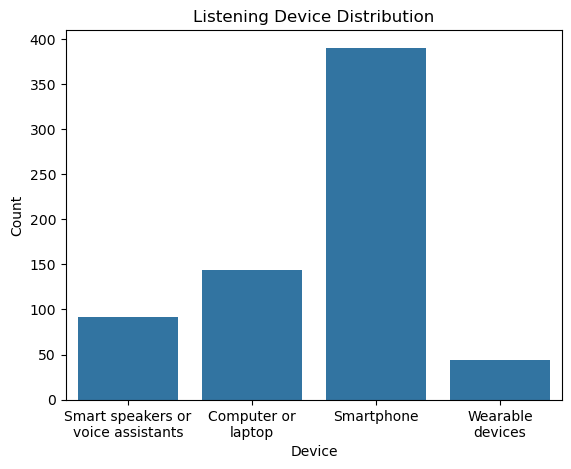

In [26]:
# Listening device
# split values into separate rows
device = df['spotify_listening_device'].str.split(',').explode().str.strip()
# plot
sns.countplot(x = device)
plt.title('Listening Device Distribution')
plt.xlabel('Device')
plt.ylabel('Count')
labels = ['Smart speakers or\nvoice assistants', 'Computer or\nlaptop', 'Smartphone', 'Wearable\ndevices']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

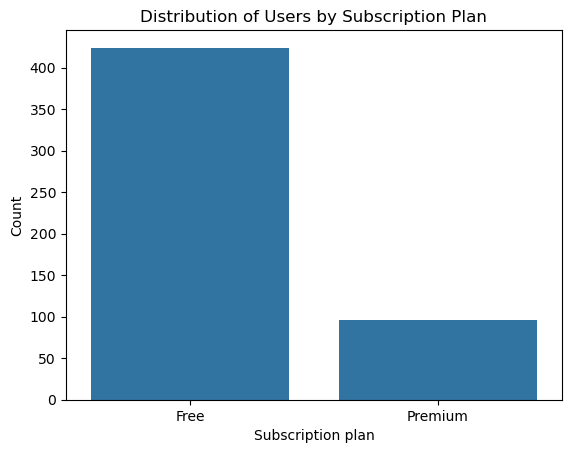

In [27]:
# Spotify subscription plan
sns.countplot(x = df['spotify_subscription_plan'])
plt.title('Distribution of Users by Subscription Plan')
plt.xlabel('Subscription plan')
plt.ylabel('Count')
labels = ['Free', 'Premium']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

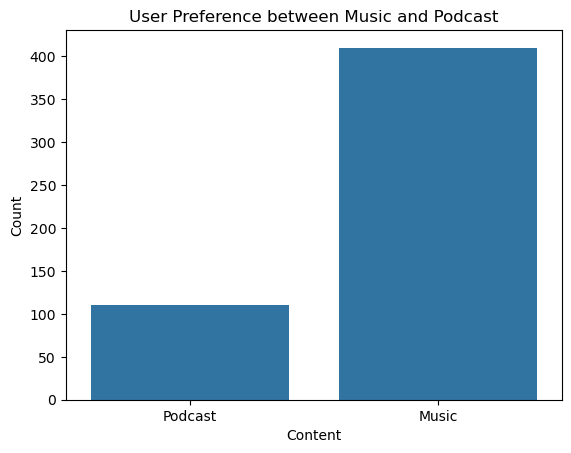

In [28]:
# Preferred listening content
sns.countplot(x = df['preferred_listening_content'])
plt.title('User Preference between Music and Podcast')
plt.xlabel('Content')
plt.ylabel('Count')
plt.show()

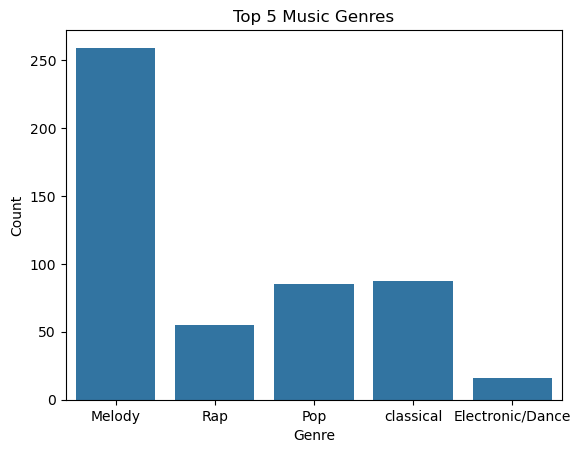

In [29]:
# Top 5 music genres
# Identify the top 5 music genres
top_genre = df['fav_music_genre'].value_counts().head(5).index
# plot
sns.countplot(x = df.loc[df['fav_music_genre'].isin(top_genre), 'fav_music_genre'])
plt.title('Top 5 Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

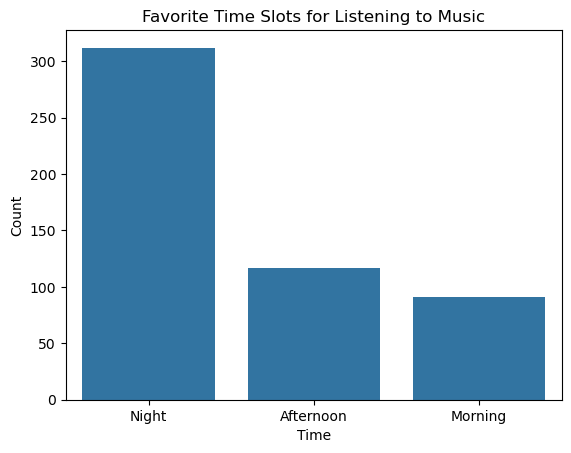

In [30]:
# Music time slot
sns.countplot(x = df['music_time_slot'])
plt.title('Favorite Time Slots for Listening to Music')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

The *music_lis_frequency* column is similar to the *spotify_listening_device* column, as it contains multiple values separated by commas. Therefore, we decided to apply the same method of separating these values by removing the commas before identifying the top five activities.

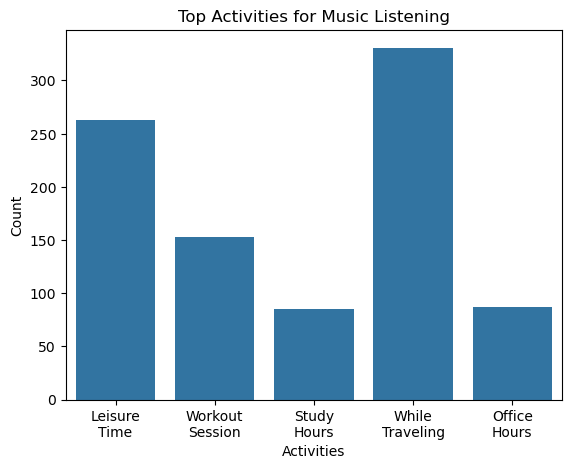

In [32]:
# Top 5 activities for music listening
# split values into separate rows
music_freq = df['music_lis_frequency'].str.split(',').explode().str.strip()
# Identify the top 5 activities
top_freq = music_freq.value_counts().head(5).index
# plot
sns.countplot(x = music_freq.loc[music_freq.isin(top_freq)])
plt.title('Top Activities for Music Listening')
plt.xlabel('Activities')
plt.ylabel('Count')
labels = ['Leisure\nTime', 'Workout\nSession', 'Study\nHours', 'While\nTraveling', 'Office\nHours']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

Similarly, the *music_expl_method* column also contains multiple values separated by commas, so we will apply the same method to separate these values.

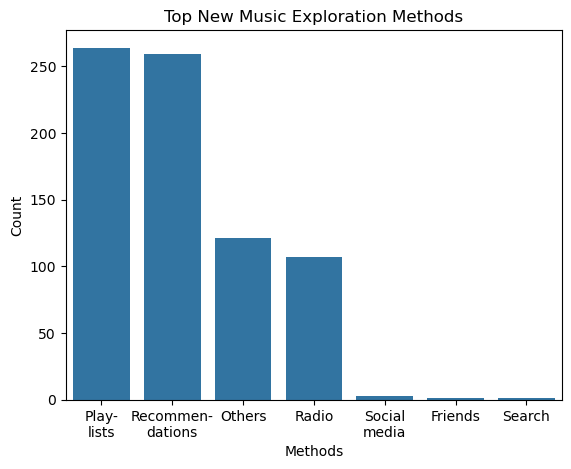

In [34]:
# Methods for Exploring New Music
# split values into separate rows
method = df['music_expl_method'].str.split(',').explode().str.strip()
# plot
sns.countplot(x = method)
plt.title('Top New Music Exploration Methods')
plt.xlabel('Methods')
plt.ylabel('Count')
labels = ['Play-\nlists', 'Recommen-\ndations', 'Others', 'Radio', 'Social\nmedia', 'Friends', 'Search']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

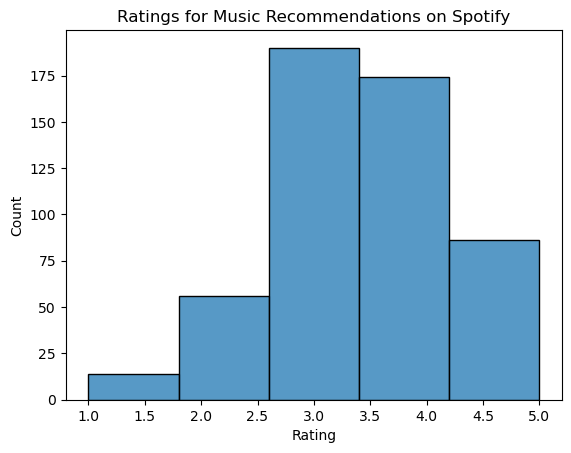

In [35]:
# Ratings for Music Recommendations on Spotify
sns.histplot(x = df['music_recc_rating'], bins = 5)
plt.title('Ratings for Music Recommendations on Spotify')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [36]:
df['music_recc_rating'].describe()

count    520.000000
mean       3.503846
std        0.979552
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: music_recc_rating, dtype: float64

The average rating for Spotify music recommendations is 3.50.

## Feature Relationships

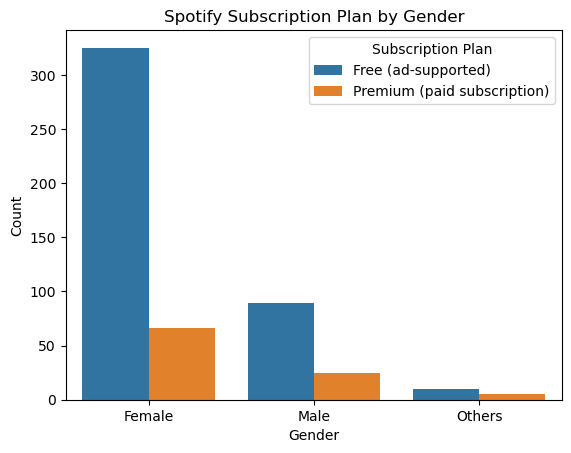

In [39]:
# Spotify subscription plan vs. Gender
sns.countplot(x = 'gender', hue = 'spotify_subscription_plan', data = df)
plt.title('Spotify Subscription Plan by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Subscription Plan')
plt.show()

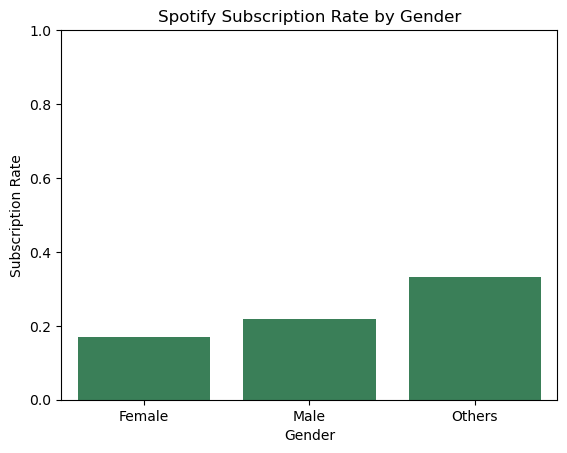

In [40]:
# Spotify subscription rate vs. Gender by Proportion
# Calculate the proportion of subscribers for each gender
df['is_subscribed'] = df['spotify_subscription_plan'].apply(lambda x: 1 if x != 'Free (ad-supported)' else 0)
df_sub_rate = df.groupby('gender')['is_subscribed'].mean().reset_index()
# plot
sns.barplot(x = 'gender', y = 'is_subscribed', color = 'seagreen', data = df_sub_rate)
plt.title('Spotify Subscription Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Subscription Rate')
plt.ylim(0, 1)
plt.show()
df = df.drop('is_subscribed', axis = 1)

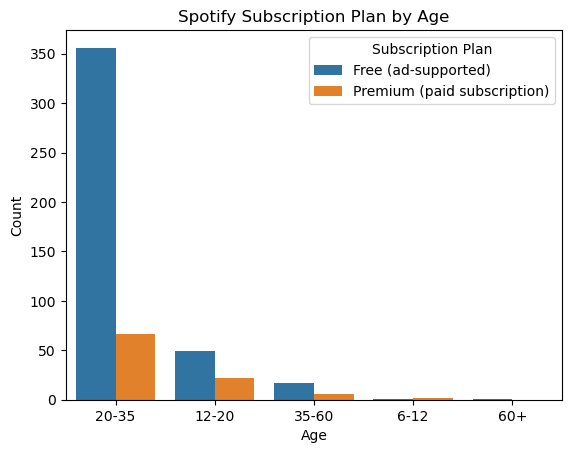

In [41]:
# Spotify subscription plan vs. Age
sns.countplot(x = 'age', hue = 'spotify_subscription_plan', data = df)
plt.title('Spotify Subscription Plan by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Subscription Plan')
plt.show()

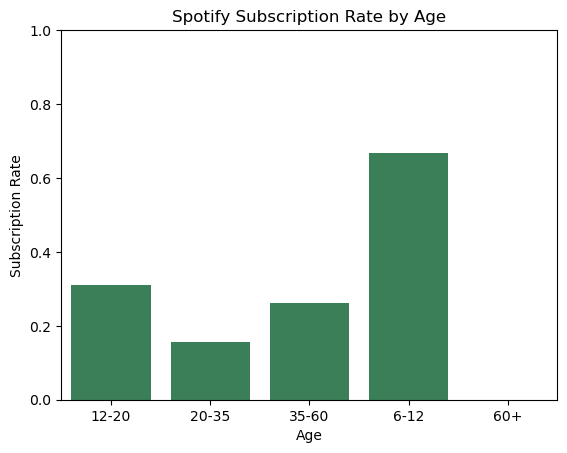

In [42]:
# Spotify subscription rate vs. Age by Proportion
df['is_subscribed'] = df['spotify_subscription_plan'].apply(lambda x: 1 if x != 'Free (ad-supported)' else 0)
df_sub_rate = df.groupby('age')['is_subscribed'].mean().reset_index()
sns.barplot(x = 'age', y = 'is_subscribed', color = 'seagreen', data = df_sub_rate)
plt.title('Spotify Subscription Rate by Age')
plt.xlabel('Age')
plt.ylabel('Subscription Rate')
plt.ylim(0, 1)
plt.show()
df = df.drop('is_subscribed', axis = 1)

The graph shows that the age group 6-12 has the highest subscription rate, which seems questionable. Let's check the sample size for this age group.

In [44]:
df['age'].value_counts()

age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

There are only 3 rows for the 6-12 age group, which is too small a sample size to accurately reflect the subscription rate for this group. The unusually high subscription rate could be due to this limited sample.

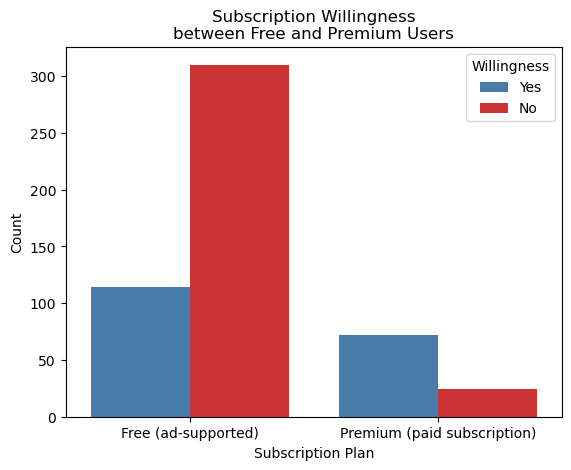

In [46]:
# Subscription willingness and continuation: Free vs. Premium users
sns.countplot(x = 'spotify_subscription_plan', hue = 'premium_sub_willingness', palette={'Yes': '#377eb8', 'No': '#e41a1c'}, data = df)
plt.title('Subscription Willingness\nbetween Free and Premium Users')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.legend(title = 'Willingness')
plt.show()

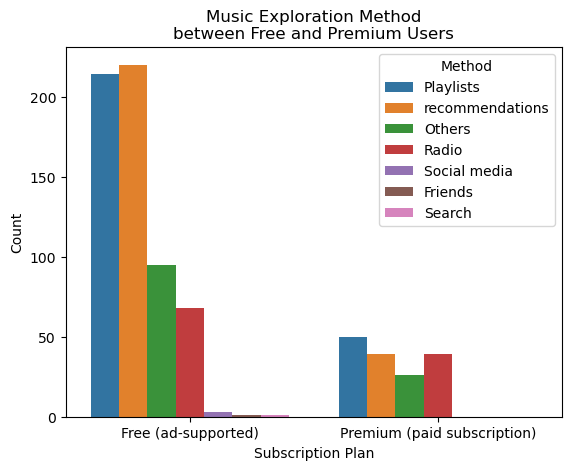

In [47]:
# Spotify subscription plan vs. New music exploration method
df2 = df.copy()
# Split the 'music_expl_method' column into lists by separating values at commas 
df2['music_expl_method'] = df2['music_expl_method'].str.split(',')
# Expand the lists into separate rows
df2_exploded = df2.explode('music_expl_method')
df2_exploded['music_expl_method'] = df2_exploded['music_expl_method'].str.strip()

# plot
sns.countplot(x = 'spotify_subscription_plan', hue = 'music_expl_method', data = df2_exploded)
plt.title('Music Exploration Method\nbetween Free and Premium Users')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.legend(title = 'Method')
plt.show()

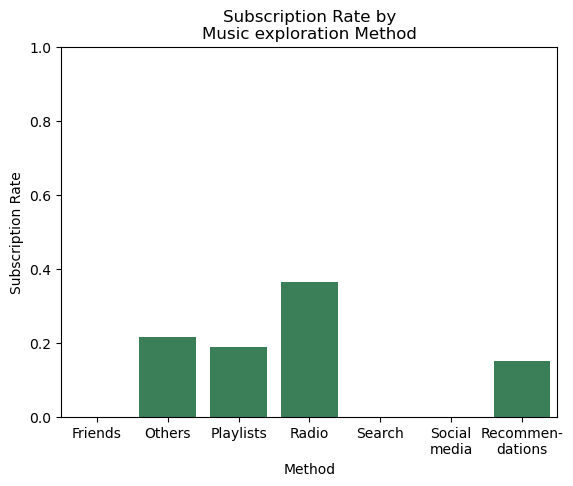

In [48]:
# Spotify subscription rate vs. New music exploration method by Proportion
df2_exploded['is_subscribed'] = df2_exploded['spotify_subscription_plan'].apply(lambda x: 1 if x != 'Free (ad-supported)' else 0)
df_sub_rate = df2_exploded.groupby('music_expl_method')['is_subscribed'].mean().reset_index()

sns.barplot(x = 'music_expl_method', y = 'is_subscribed', color = 'seagreen', data=df_sub_rate)
plt.title('Subscription Rate by\nMusic exploration Method')
plt.xlabel('Method')
plt.ylabel('Subscription Rate')
plt.ylim(0,1)
labels = ['Friends', 'Others', 'Playlists', 'Radio', 'Search', 'Social\nmedia', 'Recommen-\ndations']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

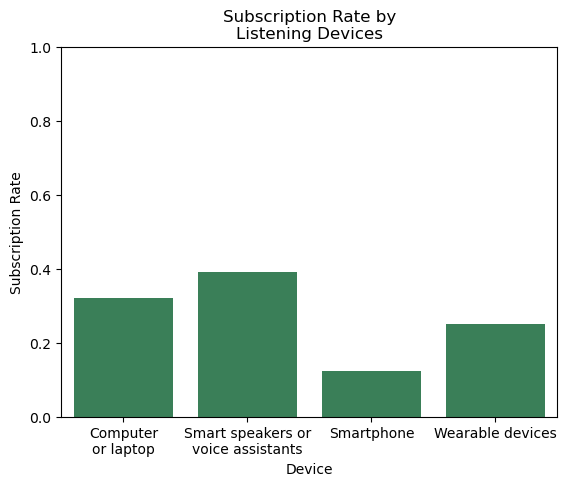

In [49]:
# Spotify subscription rate vs. Listening devices by Proportion
df2 = df.copy()
# Split the 'music_expl_method' column into lists by separating values at commas 
df2['spotify_listening_device'] = df2['spotify_listening_device'].str.split(',')
# Expand the lists into separate rows
df2_exploded = df2.explode('spotify_listening_device')
df2_exploded['spotify_listening_device'] = df2_exploded['spotify_listening_device'].str.strip()
# Calculate the proportion of subscribers for each device
df2_exploded['is_subscribed'] = df2_exploded['spotify_subscription_plan'].apply(lambda x: 1 if x != 'Free (ad-supported)' else 0)
df2_sub_rate = df2_exploded.groupby('spotify_listening_device')['is_subscribed'].mean().reset_index()

# plot
sns.barplot(x = 'spotify_listening_device', y = 'is_subscribed', color = 'seagreen', data = df2_sub_rate)
plt.title('Subscription Rate by\nListening Devices')
plt.xlabel('Device')
plt.ylabel('Subscription Rate')
plt.ylim(0,1)
labels = ['Computer\nor laptop', 'Smart speakers or\nvoice assistants', 'Smartphone', 'Wearable devices']
plt.xticks(ticks = range(len(labels)), labels = labels)
plt.show()

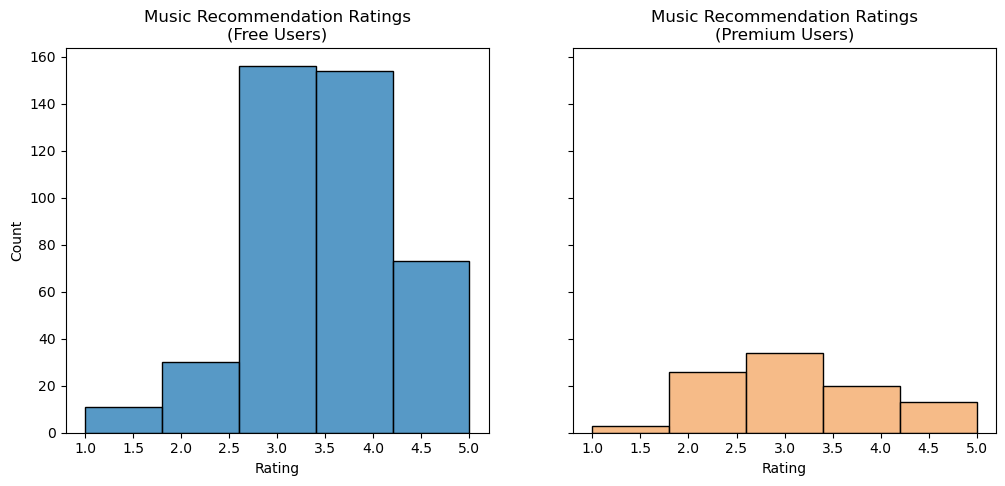

In [50]:
# Music recommendation ratings between Free and Premium users
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharey = True)

sns.histplot(x = 'music_recc_rating', bins = 5, ax = ax[0], data = df.loc[df['spotify_subscription_plan'] == 'Free (ad-supported)'])
ax[0].set_title('Music Recommendation Ratings\n(Free Users)')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')

sns.histplot(x = 'music_recc_rating', bins = 5, ax = ax[1], data = df.loc[df['spotify_subscription_plan'] == 'Premium (paid subscription)'], 
             color = 'sandybrown')
ax[1].set_title('Music Recommendation Ratings\n(Premium Users)')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')

plt.show()

In [51]:
# Average music recommendation ratings between Free and Premium users
df.groupby('spotify_subscription_plan')['music_recc_rating'].mean()

spotify_subscription_plan
Free (ad-supported)            3.584906
Premium (paid subscription)    3.145833
Name: music_recc_rating, dtype: float64

The average music recommendation ratings for Free and Premium users are 3.58 and 3.15, respectively.

## Statistical Significance Testing

### Chi-squared test

In [55]:
# Subscription plan (Free vs. Premium) vs. other features
test_col = ['gender', 'age', 'premium_sub_willingness', 'music_expl_method', 'spotify_listening_device']
results = []
for col in test_col:
    cross_table = pd.crosstab(df[col], df['spotify_subscription_plan'])
    chi2 = stats.chi2_contingency(cross_table)
    if chi2.pvalue < 0.05:
        test_result = 'Significant'
    else:
        test_result = 'Not Significant'
    results.append({'Feature': col, 'p-value': chi2.pvalue, 'Hypothesis Test Result': test_result})
results_df = pd.DataFrame(results)
results_df

,Feature,p-value,Hypothesis Test Result
0,gender,1.522314e-01,Not Significant
1,age,3.980935e-03,Significant
2,premium_sub_willingness,1.902021e-18,Significant
3,music_expl_method,3.606726e-04,Significant
4,spotify_listening_device,1.893439e-11,Significant


### T-test

A t-test assumes normality of data distribution and equal variances. Let's check if these assumptions are met before testing the relationship between Subscription plans and Music recommendation ratings.

In [58]:
# Subscription plan (Free vs. Premium) vs. Music recommendation ratings

# Check normality
free_rating = df.loc[df['spotify_subscription_plan'] == 'Free (ad-supported)', 'music_recc_rating']
premium_rating = df.loc[df['spotify_subscription_plan'] == 'Premium (paid subscription)', 'music_recc_rating']
sha_free = stats.shapiro(free_rating)
sha_premium = stats.shapiro(premium_rating)

def significant(pvalue):
    if pvalue < 0.05:
        return 'Significant (Not normally distributed)'
    else:
        return 'Not Significant (Normally distributed)'

print(f'Free group p-value: {sha_free.pvalue:} - {significant(sha_free.pvalue)}')
print(f'Premium group p-value: {sha_premium.pvalue} - {significant(sha_premium.pvalue)}')

Free group p-value: 2.264676845379941e-17 - Significant (Not normally distributed)
Premium group p-value: 1.7567563565856004e-06 - Significant (Not normally distributed)


According to the Shapiro-Wilk test, the music recommendation ratings for both subscription groups are not normally distributed. However, due to the central limit theorem, a t-test can still be performed if both groups have sufficiently large sample sizes (n > 30).

In [60]:
# Check sample sizes
df['spotify_subscription_plan'].value_counts()

spotify_subscription_plan
Free (ad-supported)            424
Premium (paid subscription)     96
Name: count, dtype: int64

Since both groups have sample sizes greater than 30, we can perform a t-test as long as the assumption of equal variances holds.

In [62]:
# Check equal variances
levene = stats.levene(free_rating, premium_rating)
if levene.pvalue < 0.05:
    sig = 'Significant (Unequal variances)'
else:
    sig = 'Not Significant (Equal variances)'
print(f'p-value: {levene.pvalue: .4f} - {sig}')

p-value:  0.4995 - Not Significant (Equal variances)


According to Levene's test, the two subscription groups have equal variances in music recommendation ratings, so we can proceed with a t-test.

In [64]:
# t-test
ttest = stats.ttest_ind(free_rating, premium_rating)
if ttest.pvalue < 0.05:
    sig = 'Significant'
else:
    sig = 'Not Significant'
print(f'p-value: {ttest.pvalue: .5f} - {sig}')

p-value:  0.00007 - Significant


Every feature tested, except for gender, showed a statistically significant relationship with the subscription plan.

## Key Findings

### From Feature Understanding:
* Over half of the users are between the ages of 20 and 35.
* There are about three times more female users than male users.
* The most commonly used device to listen to Spotify is the smartphone.
* Users are about four times more likely to prefer listening to music over podcasts.
* Nighttime listeners outnumber those who prefer morning or afternoon by about three to one.
* The two most popular methods for discovering new music on Spotify are playlists and recommendations.

### From Feature Relationships:
* No significant difference in subscription rate by gender.
* The 6-12 age group has the highest subscription rate, but with only three users in this group, the result is unreliable. The second highest rate is among the 12-20 age group, which has a sufficiently large sample size.
* Most premium users are willing to continue their subscription, while most free users prefer to remain unsubscribed.
* Users who discover new music through the radio have the highest subscription rate.
* Those who primarily use smart speakers or voice assistants to listen to Spotify have the highest subscription rate.
* The average music recommendation ratings are 3.58 for free users and 3.15 for premium users, with a statistically significant difference between the two groups.

## Conclusion

We analyzed the data to uncover valuable insights and meaningful trends in Spotify user behaviour, with a focus on key factors influencing premium membership.
* User Demographics and Behaviour:  
  The majority of users are between the ages of 20-35, and there are about three times more female users than male users. Smartphones are the most common listening device, and most users prefer listening to music over podcasts.
* Subscription Trends:  
  While the 6–12 age group showed the highest subscription rate, this result is questionable due to the small sample size. The 12–20 age group, which has a sufficient number of users, follows with a high subscription rate. Most premium users are willing to continue their subscription, whereas most free users prefer to remain unsubscribed. Additionally, users who discover new music through the radio tend to have the highest subscription rate, and those who primarily use smart speakers to listen to Spotify are also more likely to be premium subscribers.
* Music Recommendation Ratings:  
  Interestingly, free users reported slightly higher music recommendation ratings (3.58) compared to premium users (3.15), with a statistically significant difference. This suggests that premium users may have higher expectations for Spotify’s music recommendations.
  
These findings highlight key factors that influence user subscriptions and engagement. Understanding these trends can help Spotify optimize its services and enhance the user experience. Future research could explore why certain user groups are more likely to subscribe, providing valuable insights for refining Spotify's premium marketing strategies.